In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

%matplotlib inline

<h1> Data Acquisition </h1>
<h5>Hackathon Name: Chartbusters prediction Foretell Popularity of Songs</h5>
Hackathin Link: https://analyticsindiamag.com/chartbusters-prediction-foretell-the-popularity-of-songs/
<h5>Data type: csv</h5>
<h4> Rank : 114/798 </h4>
First Hackathon

Read the data using pandas library

In [3]:
data_train = pd.read_csv("Data_Train.csv")
data_train.head()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,14017,4,499,97,119563
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918,17,49,17,2141
2,681116,Maxximize On Air,danceedm,AU,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,9668,11,312,91,22248
3,387253,GR6 EXPLODE,rbsoul,AU,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,113036,2,"2,400",76,393655
4,1428029,Tritonal,danceedm,AU,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,110024,81,"3,031",699,201030


In [22]:
data_train.columns

Index(['Unique_ID', 'Name', 'Genre', 'Country', 'Song_Name', 'Timestamp',
       'Views', 'Comments', 'Likes', 'Popularity', 'Followers'],
      dtype='object')

Feature: 'Unique_ID', 'Name', 'Genre', 'Country', 'Song_Name', 'Timestamp',
        'Comments', 'Likes', 'Popularity', 'Followers'
        
        
Target: 'Views'

Check the data types of the data set

In [6]:
data_train.dtypes

Unique_ID      int64
Name          object
Genre         object
Country       object
Song_Name     object
Timestamp     object
Views          int64
Comments       int64
Likes         object
Popularity    object
Followers      int64
dtype: object

In [7]:
data_train['Likes'] = data_train['Likes'].apply(lambda s:s.replace(',',''))

In [8]:
def func(x):
    if x[-1] == 'K':
        return 1000*pd.to_numeric(re.sub('[^\d.]', '', x))
    elif x[-1] == 'M':
        return 1000000*pd.to_numeric(re.sub('[^\d.]', '', x))
    else:
        return pd.to_numeric(x)
data_train.Likes = data_train.Likes.apply(func)
data_train.Likes = data_train.Likes.astype(int)

In [9]:
data_train['Popularity'] = data_train['Popularity'].apply(lambda s:s.replace(',',''))

In [10]:
def func(x):
    if x[-1] == 'K':
        return 1000*pd.to_numeric(re.sub('[^\d.]', '', x))
    elif x[-1] == 'M':
        return 1000000*pd.to_numeric(re.sub('[^\d.]', '', x))
    else:
        return pd.to_numeric(x)
data_train.Popularity = data_train.Popularity.apply(func)
data_train.Popularity = data_train.Popularity.astype(int)

In [11]:
data_train.dtypes

Unique_ID      int64
Name          object
Genre         object
Country       object
Song_Name     object
Timestamp     object
Views          int64
Comments       int64
Likes          int32
Popularity     int32
Followers      int64
dtype: object

In [12]:
data_train.describe()

,Unique_ID,Views,Comments,Likes,Popularity,Followers
count,7.845800e+04,7.845800e+04,78458.000000,7.845800e+04,78458.000000,7.845800e+04
mean,7.451701e+05,5.469686e+05,115.270973,8.821457e+03,920.825474,4.787663e+05
std,4.805507e+05,3.883085e+06,724.614868,5.277438e+04,4810.373885,1.168120e+06
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000e+00
25%,3.149512e+05,6.216500e+03,1.000000,1.290000e+02,13.000000,1.770000e+04
50%,6.618655e+05,2.538650e+04,12.000000,6.660000e+02,87.000000,8.768200e+04
75%,1.176618e+06,1.201342e+05,61.000000,2.856750e+03,405.000000,3.936550e+05
max,1.570012e+06,1.994050e+08,104082.000000,2.770000e+06,324000.000000,9.789123e+06


In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78458 entries, 0 to 78457
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unique_ID   78458 non-null  int64 
 1   Name        78458 non-null  object
 2   Genre       78458 non-null  object
 3   Country     78458 non-null  object
 4   Song_Name   78457 non-null  object
 5   Timestamp   78458 non-null  object
 6   Views       78458 non-null  int64 
 7   Comments    78458 non-null  int64 
 8   Likes       78458 non-null  int32 
 9   Popularity  78458 non-null  int32 
 10  Followers   78458 non-null  int64 
dtypes: int32(2), int64(4), object(5)
memory usage: 4.5+ MB


In [16]:
data_train['Genre'].nunique()

21

In [17]:
data_train['Genre'].unique()

array(['danceedm', 'rbsoul', 'all-music', 'trap', 'latin', 'electronic',
       'deephouse', 'hiphoprap', 'classical', 'ambient', 'pop', 'rock',
       'reggaeton', 'country', 'disco', 'alternativerock', 'dubstep',
       'drumbass', 'metal', 'folksingersongwriter', 'indie'], dtype=object)

In [19]:
data_train['Country'].unique()

array(['AU'], dtype=object)

In [20]:
data_train.corr()

,Unique_ID,Views,Comments,Likes,Popularity,Followers
Unique_ID,1.000000,-0.008956,-0.007223,-0.011162,-0.008448,-0.026958
Views,-0.008956,1.000000,0.679104,0.980132,0.834635,0.103603
Comments,-0.007223,0.679104,1.000000,0.656645,0.641815,0.085034
Likes,-0.011162,0.980132,0.656645,1.000000,0.869048,0.110321
Popularity,-0.008448,0.834635,0.641815,0.869048,1.000000,0.138454
Followers,-0.026958,0.103603,0.085034,0.110321,0.138454,1.000000


In [21]:
data_train[['Views','Comments','Likes','Popularity']].corr()

,Views,Comments,Likes,Popularity
Views,1.000000,0.679104,0.980132,0.834635
Comments,0.679104,1.000000,0.656645,0.641815
Likes,0.980132,0.656645,1.000000,0.869048
Popularity,0.834635,0.641815,0.869048,1.000000


<AxesSubplot:xlabel='Comments', ylabel='Views'>

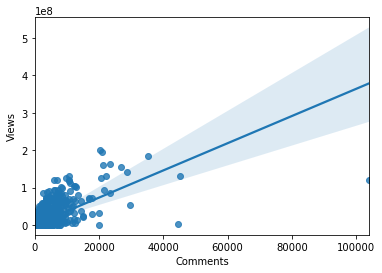

In [24]:
# Comments as potential predictor of variables
sns.regplot(x='Comments', y='Views', data=data_train)

<AxesSubplot:xlabel='Likes', ylabel='Views'>

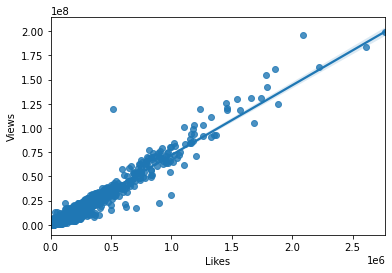

In [25]:
# Likes as potential predictor of variables
sns.regplot(x='Likes', y='Views', data=data_train)

<p>As the likes goes up, the views goes up: this indicates a positive direct correlation between these two variables. The number of likes seems like a pretty good predictor of views since the regression line is almost a perfect diagonal line.</p>


<AxesSubplot:xlabel='Popularity', ylabel='Views'>

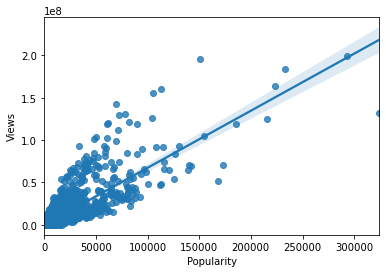

In [27]:
# Popularity as potential predictor of variables
sns.regplot(x='Popularity', y='Views', data=data_train)

<AxesSubplot:xlabel='Followers', ylabel='Views'>

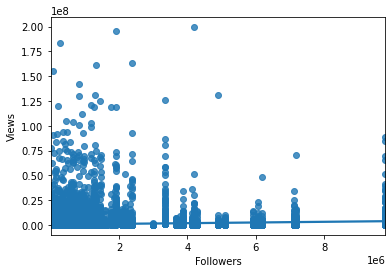

In [28]:
# Followers as potential predictor of variables
sns.regplot(x='Followers', y='Views', data=data_train)

<p>Followers does not seem like a good predictor of the Views at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.</p>


In [30]:
data_train.describe(include=['object'])

,Name,Genre,Country,Song_Name,Timestamp
count,78458,78458,78458,78457,78458
unique,1209,21,1,78457,68187
top,Mixmag,danceedm,AU,Michael White - All Eyes On Me [NCS Release],2011-01-01 00:00:00.000000
freq,2065,22633,78458,1,274


In [32]:
data_train['Genre'].value_counts().to_frame()

,Genre
danceedm,22633
electronic,18331
all-music,10277
rbsoul,5411
latin,4562
trap,4055
rock,4000
deephouse,2423
pop,1787
dubstep,1100


<AxesSubplot:>

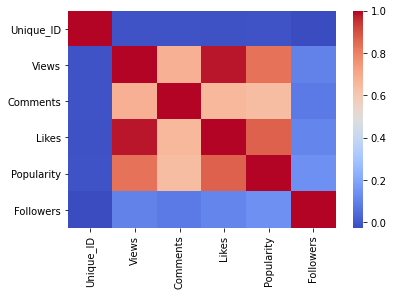

In [33]:
sns.heatmap(data_train.corr(), cmap='coolwarm')

### P-value

Likes vs Views

In [36]:
pearson_coef, p_value = stats.pearsonr(data_train['Likes'], data_train['Views'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.9801320569227572  with a P-value of P = 0.0


#### Conclusion
<p>Since the p-value is $<$ 0.001, the correlation between Likes and Views is statistically significant, also the linear relationship is extremely strong (~0.98)</p>

Comments vs Views

In [39]:
pearson_coef, p_value = stats.pearsonr(data_train['Comments'], data_train['Views'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6791042273098138  with a P-value of P = 0.0


#### Conclusion
<p>Since the p-value is $<$ 0.001, the correlation between Comments and Views is statistically significant, although the linear relationship is moderately strong (~0.68)</p>

Poplularity vs Views

In [41]:
pearson_coef, p_value = stats.pearsonr(data_train['Popularity'], data_train['Views'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8346354219703414  with a P-value of P = 0.0


#### Conclusion
<p>Since the p-value is $<$ 0.001, the correlation between Popularity and Views is statistically significant, also the linear relationship is extremely strong (~0.83)</p>

Followers vs Views

In [43]:
pearson_coef, p_value = stats.pearsonr(data_train['Followers'], data_train['Views'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.10360323988059138  with a P-value of P = 3.861151441991081e-186


#### Conclusion
<p>Since the p-value is $<$ 0.001, the correlation between Followers and Views is statistically significant, although the linear relationship is extremely week (~0.1)</p>

<h3>Conclusion: Important Variables</h3>


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Likes</li>
    <li>Comments</li>
    <li>Popularity</li>
    <li>Followers</li>
</ul>

In [114]:
data_train.columns

Index(['Unique_ID', 'Name', 'Genre', 'Country', 'Song_Name', 'Timestamp',
       'Views', 'Comments', 'Likes', 'Popularity', 'Followers'],
      dtype='object')

In [115]:
X = data_train[['Comments', 'Likes', 'Popularity', 'Followers']]
Y = data_train['Views']

In [116]:
X.shape, Y.shape

((78458, 4), (78458,))

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
ss = StandardScaler()

In [119]:
X = ss.fit_transform(X)
X

array([[-0.15355976, -0.15769982, -0.17126127, -0.30750745],
       [-0.13561908, -0.16622674, -0.1878921 , -0.40803029],
       [-0.14389939, -0.16124323, -0.17250858, -0.39081705],
       ...,
       [-0.15769991, -0.16418028, -0.1849817 ,  0.79126846],
       [-0.12595871, -0.16012525, -0.17292435, -0.28680739],
       [-0.15355976, -0.13249804, -0.17666629, -0.33359997]])

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=1)

In [122]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((54920, 4), (23538, 4), (54920,), (23538,))

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
model = LinearRegression()

In [125]:
model.fit(x_train, y_train)

LinearRegression()

In [126]:
ypred = model.predict(x_val)

In [127]:
ypred.shape

(23538,)

In [128]:
y_val.shape

(23538,)

In [129]:
np.sqrt(np.mean(np.square(ypred-y_val)))

840794.8732949211

In [138]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.25, random_state=1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
ypred = model.predict(x_val)
np.sqrt(np.mean(np.square(ypred-y_val)))

899192.0160749903

In [139]:
np.sqrt(np.mean(np.square(model.predict(x_train)-y_train)))

684916.138170773

In [140]:
np.sqrt(np.mean(np.square(ypred-y_val))), np.sqrt(np.mean(np.square(model.predict(x_train)-y_train)))

(899192.0160749903, 684916.138170773)

# TESTING

In [146]:
datatest = pd.read_csv("Data_Test.csv")

In [147]:
datatest.head(2)

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Comments,Likes,Popularity,Followers
0,562546,L2Share♫79,all-music,AU,엔플라잉 N.Flying - Rooftop (옥탑방),2019-01-02 09:49:19.000000,26,"5,428",118,2568
1,907584,Morgan Page,danceedm,AU,Morgan Page - In The Air - Episode 246,2015-03-09 17:30:10.000000,18,738,195,155645


In [166]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19615 entries, 0 to 19614
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unique_ID   19615 non-null  int64 
 1   Name        19615 non-null  object
 2   Genre       19615 non-null  object
 3   Country     19615 non-null  object
 4   Song_Name   19615 non-null  object
 5   Timestamp   19615 non-null  object
 6   Comments    19615 non-null  int64 
 7   Likes       19615 non-null  int32 
 8   Popularity  19615 non-null  int32 
 9   Followers   19615 non-null  int64 
dtypes: int32(2), int64(3), object(5)
memory usage: 996.1+ KB


In [148]:
datatest['Likes'] = datatest['Likes'].apply(lambda s:s.replace(',',''))

In [149]:
def func(x):
    if x[-1] == 'K':
        return 1000*pd.to_numeric(re.sub('[^\d.]', '', x))
    elif x[-1] == 'M':
        return 1000000*pd.to_numeric(re.sub('[^\d.]', '', x))
    else:
        return pd.to_numeric(x)
datatest['Likes'] = datatest['Likes'].apply(func)
datatest['Likes'] = datatest['Likes'].astype(int)

In [150]:
datatest['Popularity'] = datatest['Popularity'].apply(lambda s:s.replace(',',''))

In [151]:
def func1(y):
    if y[-1] == 'K':
        return 1000*pd.to_numeric(re.sub('[^\d.]','',y))
    elif y[-1] == 'M':
        return 1000000*pd.to_numeric(re.sub('[^\d.]','',y))
    else:
        return pd.to_numeric(y)
datatest['Popularity'] = datatest['Popularity'].apply(func1)
datatest['Popularity'] = datatest['Popularity'].astype(int)

<AxesSubplot:>

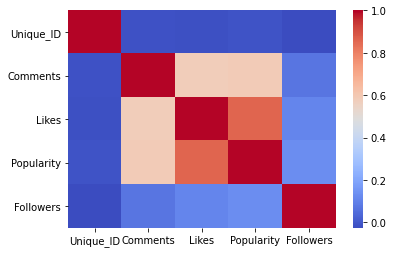

In [152]:
sns.heatmap(datatest.corr(), cmap='coolwarm')

In [172]:
X1 = datatest[['Comments', 'Likes', 'Popularity', 'Followers']]
X1.shape

(19615, 4)

In [173]:
X1 = ss.fit_transform(X1)

In [174]:
X1.shape

(19615, 4)

In [175]:
X1

array([[-0.10647249, -0.06800573, -0.16674032, -0.41107355],
       [-0.11564581, -0.15824975, -0.15147465, -0.28017874],
       [-0.11564581, -0.16502286, -0.17110194, -0.3880904 ],
       ...,
       [-0.13055246, -0.17169976, -0.1877554 , -0.2719502 ],
       [-0.00671257, -0.1002165 , -0.05809631, -0.36831471],
       [-0.12481914, -0.16038559, -0.16218044, -0.31103214]])

In [176]:
%%time
model = LinearRegression()

model.fit(x_train, y_train)

ypred = model.predict(x_train)

print(np.sqrt(np.mean(np.square(ypred-y_train))), np.sqrt(np.mean(np.square(model.predict(x_train)-y_train))))


684916.138170773 684916.138170773
Wall time: 33.3 ms


In [177]:
y_train.shape

(58843,)

In [178]:
ypred.shape

(58843,)

In [179]:
test_ids = datatest.Unique_ID

In [180]:
ypred = model.predict(X1)

In [184]:
results = pd.DataFrame()
results['Unique_ID'] = test_ids
results['Views'] = abs(ypred)
# results.to_excel('results.xlsx', index=False)

In [185]:
results.head()

,Unique_ID,Views
0,562546,319164.350429
1,907584,51930.549439
2,213013,72641.246099
3,340312,71738.968333
4,41854,92055.323715
